<a href="https://colab.research.google.com/github/amruthraghav/COMP3270/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1 (Decision Tree on Mushroom dataset)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
# Please enter into the corresponding location where the mushrooms.csv file is present
# cd drive/My\ Drive/HKU/Year4Sem1/COMP3270

/content/drive/My Drive/HKU/Year4Sem1/COMP3270


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv("mushrooms.csv")
data_cols = data.columns
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [ ]:
labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,0,2,1,0,7,4,2


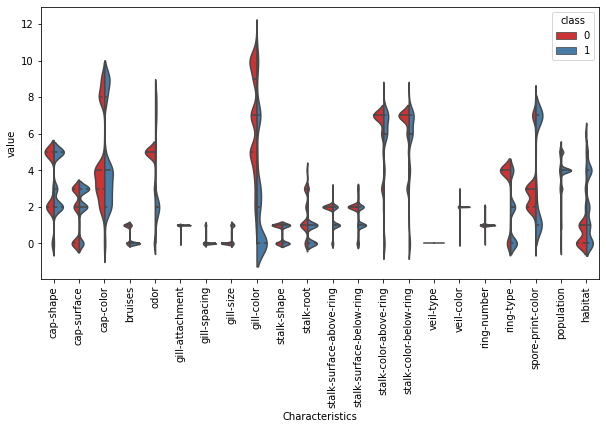

In [ ]:
df = data
df_div = pd.melt(df, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(10,5))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'Set1')
df_no_class = df.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));

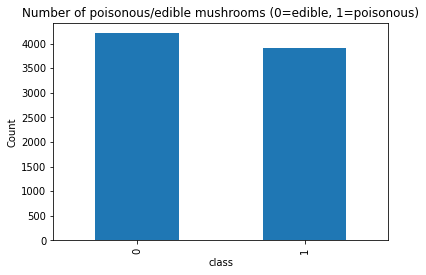

In [ ]:
plt.figure()
pd.Series(df['class']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("class")
plt.title('Number of poisonous/edible mushrooms (0=edible, 1=poisonous)');

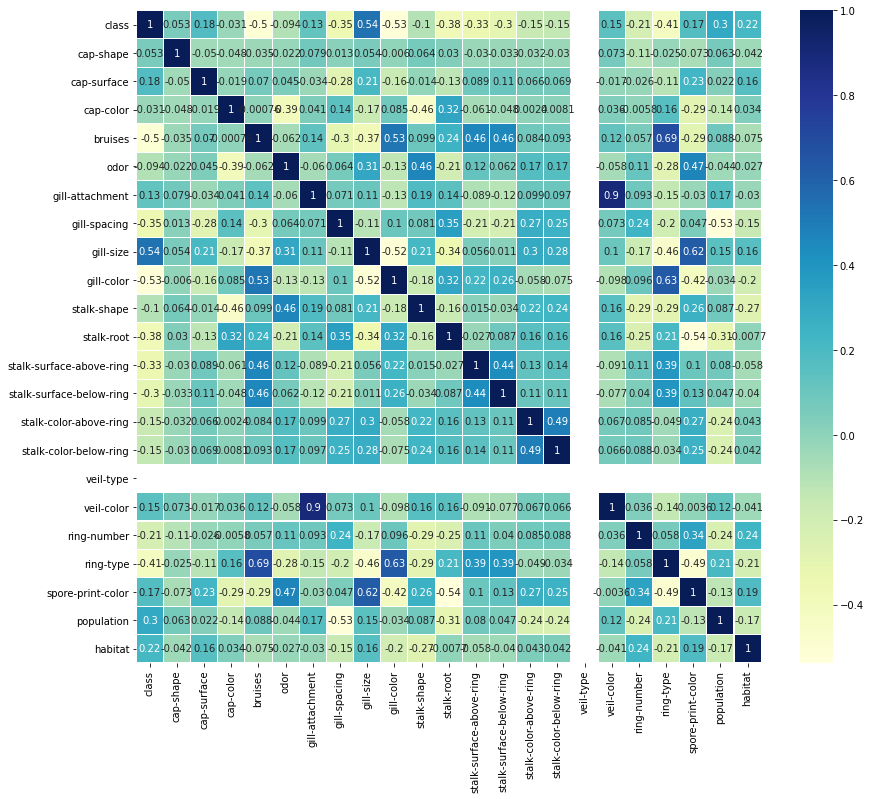

In [ ]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [ ]:
X=data.drop(['class'], axis=1)
Y=data['class']

In [ ]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.25)

In [ ]:
X_train

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
6881,2,3,4,0,2,1,0,1,0,1,0,1,1,6,6,0,2,1,0,7,4,2
544,2,0,4,0,5,1,1,0,5,1,3,2,2,7,7,0,2,1,0,2,0,1
2702,5,3,2,1,5,1,0,0,5,1,1,2,2,3,7,0,2,1,4,2,4,0
2934,5,3,4,1,5,1,0,0,10,1,1,2,2,3,3,0,2,1,4,2,4,0
6666,5,3,2,0,7,1,0,1,0,1,0,2,1,7,6,0,2,1,0,7,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,5,2,4,0,5,1,1,0,5,1,3,0,2,7,7,0,2,1,0,2,0,1
5898,2,2,2,1,5,1,0,0,1,0,0,2,2,7,7,0,2,2,0,7,1,6
2512,5,2,8,0,1,1,1,1,7,0,1,2,2,7,7,0,2,1,4,3,3,0
5958,5,3,9,0,2,1,0,0,2,0,1,1,1,4,0,0,2,1,2,1,5,1


In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

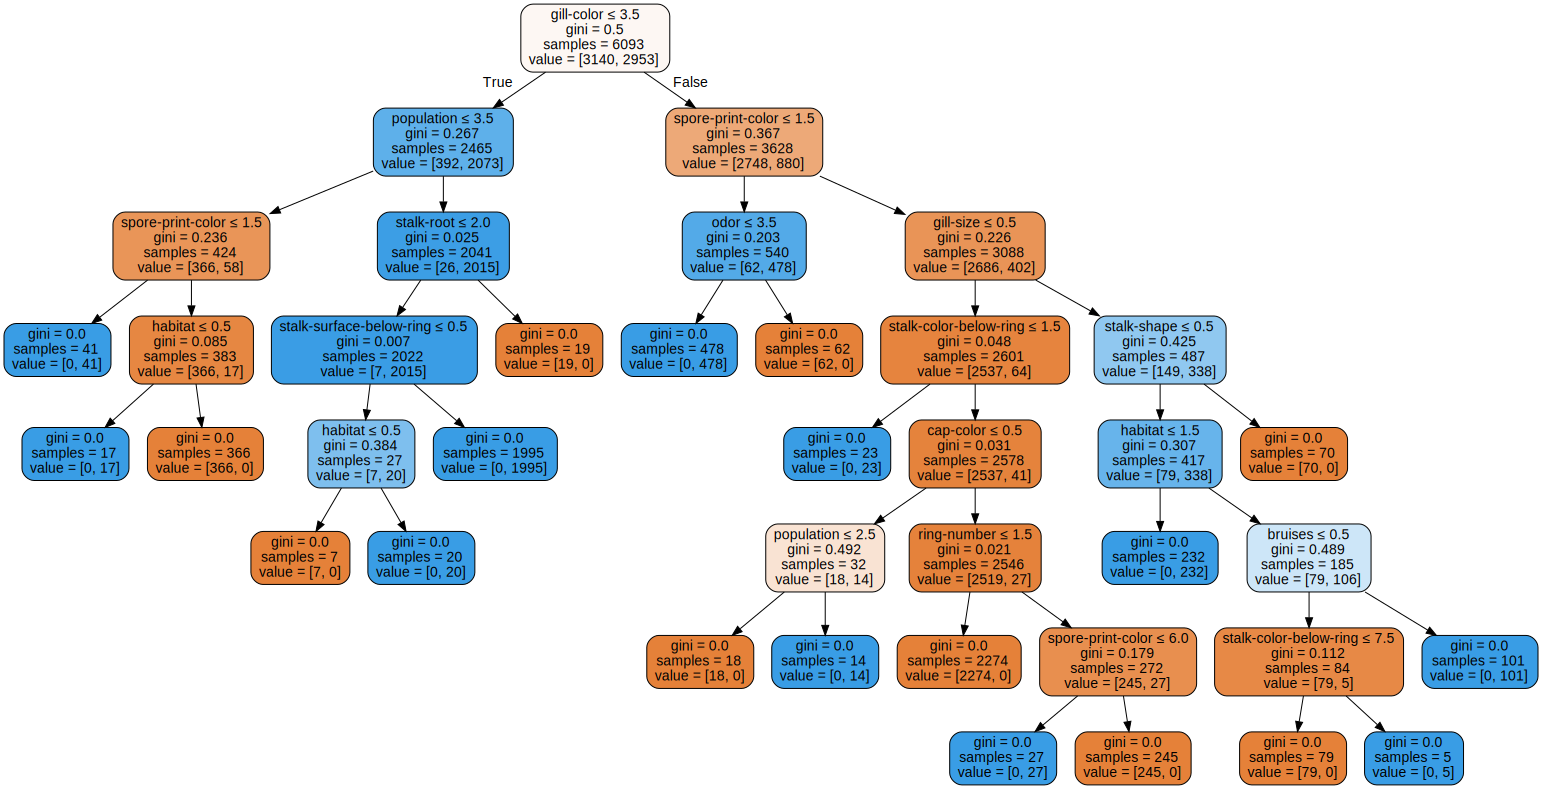

In [ ]:
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

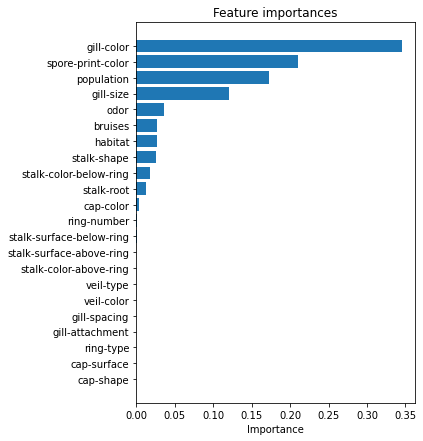

In [ ]:
features_list = X.columns.values
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(5,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()

In [ ]:
y_pred=clf.predict(X_test)

### Decision Tree Classifier (Accuracy ~ 100%)

In [ ]:
print("Decision Tree Classifier report \n", classification_report(Y_test, y_pred))

Decision Tree Classifier report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1068
           1       1.00      1.00      1.00       963

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



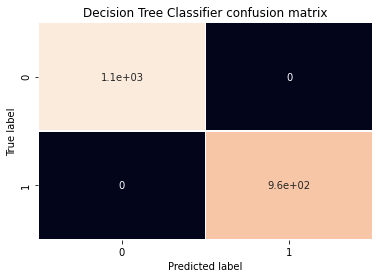

In [ ]:
cfm=confusion_matrix(Y_test, y_pred)

sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

100% Accuracy has been achieved, which means the model is overfitting the testings data

In [ ]:
accuracy_score(Y_test, y_pred)*100

100.0

### Trying Guasian Naive Bayes (Accuracy ~ 91.3%)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
clf_GNB = GaussianNB()
clf_GNB = clf_GNB.fit(X_train, Y_train)

In [ ]:
Y_predict = clf_GNB.predict(X_test)
accuracy_score(Y_test, Y_predict)*100

91.2850812407681

# Question 2 (Naive Bayes and Support Vector Machine for Face Database)

In [ ]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [ ]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [ ]:
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

Extracting the top 150 eigenfaces from 966 faces
done in 0.265s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.025s


### b) Support Vector Machine(SVM) (Accuracy ~ 87%)

In [ ]:
clf = SVC(kernel='rbf', class_weight='balanced', C=1000.0, gamma=0.005)
clf = clf.fit(X_train_pca, y_train)

In [ ]:
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.88      0.54      0.67        13
     Colin Powell       0.81      0.87      0.84        60
  Donald Rumsfeld       0.89      0.63      0.74        27
    George W Bush       0.83      0.98      0.90       146
Gerhard Schroeder       0.95      0.80      0.87        25
      Hugo Chavez       1.00      0.53      0.70        15
       Tony Blair       0.97      0.78      0.86        36

         accuracy                           0.85       322
        macro avg       0.90      0.73      0.80       322
     weighted avg       0.87      0.85      0.85       322



### a) Naive Bayes Classifier (Accuracy ~ 72.67%)

In [ ]:
clf_GNB = GaussianNB()
clf_GNB = clf_GNB.fit(X_train_pca, y_train)

In [ ]:
Y_predict = clf_GNB.predict(X_test_pca)
accuracy_score(y_test, Y_predict)*100

72.67080745341616

## Question 3 (Using VCG16 Model)



In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications import VGG16

In [ ]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, color=True)
X = lfw_people.images
y = lfw_people.target
n_samples, h, w, t = X.shape   #t=3, 3 color channels
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

In [ ]:
Xnew = np.zeros((1288, 64, 64, 3))  # initialize to zero
for i in range(X.shape[0]):   # for each image
    for j in range(X.shape[1]):   # for each row
        for k in range(X.shape[2]):   # for each column
            for l in range(X.shape[3]):   # for each color component
                Xnew[i][j][k][l] = X[i][j][k][l] / 255

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(
              Xnew, y, test_size=0.25, random_state=42)


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False,input_shape=(64, 64, 3))
for layer in base_model.layers:
    layer.trainable = False


58892288/58889256 [==============================] - 2s 0us/step


In [ ]:
model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))

#model.add(layers.Dropout(0.2))
model.add(layers.Dense(1024, activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))

model = models.Model(inputs=base_model.input, outputs=model(base_model.output))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics =["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=50,
           validation_data=(X_test, y_test))

Epoch 1/20
20/20 [==============================] - 53s 3s/step - loss: 2.3793 - accuracy: 0.4006 - val_loss: 1.2782 - val_accuracy: 0.5807
Epoch 2/20
20/20 [==============================] - 53s 3s/step - loss: 1.1736 - accuracy: 0.5807 - val_loss: 0.9023 - val_accuracy: 0.6957
Epoch 3/20
20/20 [==============================] - 53s 3s/step - loss: 0.8657 - accuracy: 0.7019 - val_loss: 0.6989 - val_accuracy: 0.7826
Epoch 4/20
20/20 [==============================] - 53s 3s/step - loss: 0.5609 - accuracy: 0.8106 - val_loss: 0.6446 - val_accuracy: 0.8230
Epoch 5/20
20/20 [==============================] - 53s 3s/step - loss: 0.4806 - accuracy: 0.8251 - val_loss: 0.6611 - val_accuracy: 0.7640
Epoch 6/20
20/20 [==============================] - 53s 3s/step - loss: 0.5289 - accuracy: 0.8075 - val_loss: 0.6508 - val_accuracy: 0.7950
Epoch 7/20
20/20 [==============================] - 53s 3s/step - loss: 0.2984 - accuracy: 0.9089 - val_loss: 0.5425 - val_accuracy: 0.8385
Epoch 8/20
20/20 [==

In [ ]:
model.evaluate(X_test, y_test, verbose=2)

11/11 - 12s - loss: 0.5636 - accuracy: 0.8727


[0.5635550618171692, 0.8726708292961121]

[]

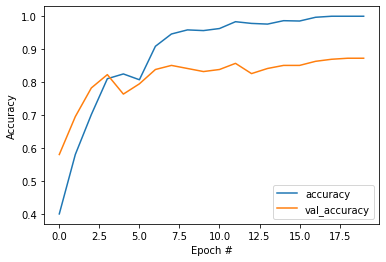

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

## Accuracy is around 87%